In [2]:
import torch
import torchvision
import torch.nn.functional as F
import numpy as np

In [159]:
img_size = 400
coords = torch.Tensor([[20,20]])
coords_norm = torch.Tensor([[0,0]])
# coords_norm = (coords / img_size - 0.5)*2
coords_norm = coords_norm.unsqueeze(0).unsqueeze(2)
print(coords_norm.shape)
coords_norm

torch.Size([1, 1, 1, 2])


tensor([[[[0., 0.]]]])

In [138]:
latent = torch.arange(0,400).view(1,1,20,20).float()
# latent

In [160]:
F.grid_sample(
latent,
coords_norm
)

tensor([[[[199.5000]]]])

In [ ]:
! which python

In [136]:
latent[0, :, 19, 19]

tensor([399.])

In [137]:
# F.interpolate(latent, scale_factor=2, mode='bilinear')

In [28]:
x = torch.rand((1024,1,512))
x.shape

torch.Size([1024, 1, 512])

In [30]:
x_rep = x.expand(-1, 512, -1)

In [31]:
x_rep[0][0][0]

tensor(0.2753)

In [32]:
x_rep[0][1][0]

tensor(0.2753)

In [34]:
y = torch.tensor([[1], [2], [3]])

In [60]:
# x.repeat(1,512,1)[0][:][0].eq(x_rep[0][:][0])
import torch.autograd.profiler as profiler
x = torch.randn((1, 1), requires_grad=True).cuda()
x

tensor([[-3.3241]], device='cuda:0', grad_fn=<CopyBackwards>)

In [67]:
def sqrt(x):
    with profiler.record_function("sqrt"):
        y = x ** 2
        y.backward()

# with profiler.profile() as prof:
for _ in range(100):  # any normal python code, really!
    sqrt(x)
 # NOTE: some columns were removed for brevity
print(profiler.profile().key_averages().table(sort_by="self_cpu_time_total"))

RuntimeError: can't export a trace that didn't finish running

In [25]:
from data import *
srn_base_train = '/mnt/lustre/yslan/Repo/NVS/Projects/volume_rendering/srn_dataset/cars'
train_set, train_test = get_split_dataset(
    'srn', srn_base_train, split=["train", "train_test"])
        

Loading SRN dataset /mnt/lustre/yslan/Repo/NVS/Projects/volume_rendering/srn_dataset/cars_train name: cars
Loading SRN dataset /mnt/lustre/yslan/Repo/NVS/Projects/volume_rendering/srn_dataset/cars_train_test name: cars


In [26]:
instance = [s[0] for s in (train_set, train_test)]

In [27]:
input_views = instance[0]['images'][(0,38),...]
[i['images'][[0,38],...] for i in instance][1].shape

torch.Size([2, 128, 128, 3])

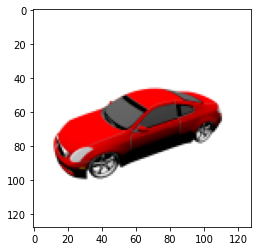

In [29]:
import matplotlib.pyplot as plt

plt.imshow(input_views[0]  ) # put channel as last dim

In [ ]:
instance[0]['poses'][0,...]

In [ ]:
data_loader = torch.utils.data.DataLoader(
    dset, batch_size=1, shuffle=False, num_workers=8, pin_memory=False
)

In [10]:
instance[0]['poses'][0,...]

NameError: name 'instance' is not defined

In [45]:
a, b, c = *[1,2], 3

In [54]:
torch.__version__

'1.7.0+cu101'

In [73]:
list(torch.Tensor(2,2).shape)

[2, 2]

In [5]:
np.random.rand(2,2).shape

(2, 2)

In [ ]:
torch.arange(100)[::2]

In [9]:
np.random.choice(np.arange(100),size=20
                )

array([30, 61, 55, 18, 39, 57,  1, 38, 91, 66, 77, 83,  6, 25, 39, 62, 41,
       83, 25, 36])

In [27]:
a = torch.rand(3,4)

In [35]:
a.view(4,3)

tensor([[0.6794, 0.7816, 0.1609],
        [0.2469, 0.7390, 0.0542],
        [0.9977, 0.8102, 0.2566],
        [0.9576, 0.1680, 0.2440]])

In [37]:
a.numpy().reshape([4,3])

array([[0.67937046, 0.7815552 , 0.16089189],
       [0.24692017, 0.7389665 , 0.05421507],
       [0.9977419 , 0.8102282 , 0.25664413],
       [0.9575524 , 0.16803193, 0.24403864]], dtype=float32)

In [39]:
torch.reshape(a, [4,3])

tensor([[0.6794, 0.7816, 0.1609],
        [0.2469, 0.7390, 0.0542],
        [0.9977, 0.8102, 0.2566],
        [0.9576, 0.1680, 0.2440]])

In [3]:
import matplotlib.pyplot as plt
from data.load_blender import *
from data import *

In [1]:
datadir = '../nerf_dataset/nerf_synthetic/hotdog'
images, poses, render_poses, hwf, i_split = load_blender_data(
            datadir, True, 8
        )

NameError: name 'load_blender_data' is not defined

In [142]:
import tqdm
from tqdm import trange, tqdm

In [143]:
trange(1,10)

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

In [7]:
images[0].shape

(400, 400, 4)

In [30]:
srn_datadir = '/mnt/lustre/yslan/Repo/NVS/Projects/volume_rendering/srn_dataset/cars'
train_set, train_test = get_split_dataset(
    'srn', srn_datadir, split=["train", "train_test"]
)

Loading SRN dataset /mnt/lustre/yslan/Repo/NVS/Projects/volume_rendering/srn_dataset/cars_train name: cars
Loading SRN dataset /mnt/lustre/yslan/Repo/NVS/Projects/volume_rendering/srn_dataset/cars_train_test name: cars


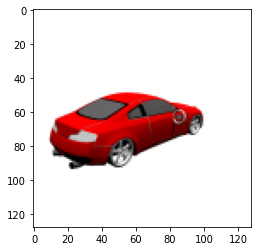

In [123]:
plt.imshow(
train_set[0]['images'][170]
)

In [6]:
train_set[0]['c']

tensor([64., 64.])

In [128]:
test_imgs = train_test[0]['images'][::1]

In [129]:
test_imgs.shape

torch.Size([251, 128, 128, 3])

In [9]:
import imageio

In [25]:
tst_base='/mnt/lustre/yslan/Repo/NVS/Projects/nerf-pytorch/logs/PIXNERF/SRN/srn_car_nerf_50views/testset_200000/'
img_path = '/mnt/lustre/yslan/Repo/NVS/Projects/volume_rendering/srn_dataset/cars_test/1079efee042629d4ce28f0f1b509eda/rgb/000000.png'

(512, 512, 4)


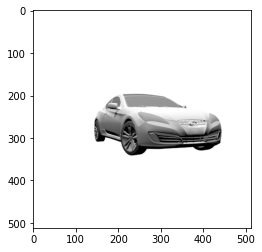

In [26]:
shapenet_img = np.asarray(imageio.imread(img_path))
print(shapenet_img.shape)
plt.imshow(shapenet_img)

In [124]:
train_imgs = train_set[0]['images']

In [21]:
# Misc
img2mse = lambda x, y: np.mean((x - y) ** 2)
mse2psnr = (
    lambda x: -10.0
    * np.log10(np.clip(x, 0, 1))
    # / torch.log(torch.Tensor([10.0]))
)  # * ln(x) / ln(y) = log_y^x


def to8b(x):
    if type(x) is not np.ndarray:
        x = x.cpu().numpy()
    return (255 * np.clip(x, 0, 1)).astype(np.uint8)

def to1b(x):
    if type(x) is not np.ndarray:
        x = x.cpu().numpy()
    return (x/255).astype(np.uint8)

In [19]:
mse2psnr(img2mse(np.ones_like(shapenet_img), shapenet_img))

8.524797238481515

In [63]:
mse2psnr(0.000317)

34.98940737782248

In [38]:
np.random.rand(3,4)[[1]].shape


(1, 4)

In [57]:
train_set[0].keys()

dict_keys(['path', 'img_id', 'focal', 'c', 'images', 'masks', 'bbox', 'poses'])

In [6]:
train_test[0]['path']

'/mnt/lustre/yslan/Repo/NVS/Projects/volume_rendering/srn_dataset/cars_train_test/100715345ee54d7ae38b52b4ee9d36a3'

In [7]:
torch.linspace(0,99,100)

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27.,
        28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41.,
        42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55.,
        56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69.,
        70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82., 83.,
        84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94., 95., 96., 97.,
        98., 99.])

In [46]:
torch.rand(3,5).reshape([1,-1, 3])

tensor([[[0.0292, 0.1528, 0.6505],
         [0.8060, 0.6493, 0.0758],
         [0.6976, 0.2117, 0.8989],
         [0.6798, 0.6541, 0.5438],
         [0.2026, 0.9783, 0.0339]]])

In [63]:
views = list(range(250))[::5]
views.extend([10000]) if 1000 not in views

SyntaxError: invalid syntax (<ipython-input-63-120102fdaa8a>, line 2)

In [58]:
np.linspace(0,249,50,dtype=int)

array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
        66,  71,  76,  81,  86,  91,  96, 101, 106, 111, 116, 121, 127,
       132, 137, 142, 147, 152, 157, 162, 167, 172, 177, 182, 188, 193,
       198, 203, 208, 213, 218, 223, 228, 233, 238, 243, 249])

In [69]:
xyz = torch.randint(0,128,(4096,3)).float()

In [70]:
poses = torch.rand(2,3,4)

In [81]:
xyz_rot = torch.matmul(poses[:,None,:3,:3], xyz.reshape(1,-1,3,1))

In [76]:
poses[:,None,:3,3:]

tensor([[[[0.0971],
          [0.2462],
          [0.3631]]],


        [[[0.6111],
          [0.4376],
          [0.9160]]]])

In [86]:
xyz_tr = xyz_rot + poses[:,None,:3,3:]
# poses[:,None,:3,3:] + xyz

In [90]:
poses[:,None,:3,3:].shape

torch.Size([2, 1, 3, 1])

In [84]:
xyz_rot.shape

torch.Size([2, 4096, 3, 1])

In [87]:
xyz_rot[0,0,:]

tensor([[34.8480],
        [34.8130],
        [22.5250]])

In [88]:
xyz_tr[0,0,:]

tensor([[34.9452],
        [35.0592],
        [22.8881]])

In [91]:
xyz_tr.shape

torch.Size([2, 4096, 3, 1])

In [92]:
torch.repeat_interleave(xyz_tr, 2, 0).shape

torch.Size([4, 4096, 3, 1])

In [57]:
def compute_pose_error(gt, pred, return_all=False):
    RE = []
    snippet_length = gt.shape[0]
    scale_factor=1
#     scale_factor = np.sum(gt[:, :, -1] * pred[:, :, -1]
#                           )/np.sum(pred[:, :, -1] ** 2)
    ATE = np.linalg.norm(
        (gt[:, :, -1] - scale_factor * pred[:, :, -1]),axis=-1)
    for gt_pose, pred_pose in zip(gt, pred):
        # Residual matrix to which we compute angle's sin and cos
        R = gt_pose[:, :3] @ np.linalg.inv(pred_pose[:, :3])
        s = np.linalg.norm([R[0, 1]-R[1, 0],
                            R[1, 2]-R[2, 1],
                            R[0, 2]-R[2, 0]])
        c = np.trace(R) - 1
        # Note: we actually compute double of cos and sin, but arctan2 is invariant to scale
        RE.append(np.arctan2(s, c))
    RE = np.asarray(RE)
    if not return_all:
        return ATE.mean(), RE.mean()
    return ATE, RE

#     return ATE/snippet_length, RE/snippet_length

In [7]:
train_test[0].keys()

dict_keys(['path', 'img_id', 'focal', 'c', 'images', 'masks', 'bbox', 'poses'])

In [12]:
poses = train_test[0]['poses'].cpu().numpy()[:,:3,:]

In [68]:
ATE, RE = compute_pose_error(poses,poses, return_all=True)

In [29]:
fix_id=0
other_pose = poses[fix_id+1:,...]
fix_pose=poses[:fix_id+1,...].repeat(other_pose.,0,)

In [30]:
fix_pose.shape

(250, 3, 4)

In [71]:
ATE, RE = compute_pose_error(fix_pose, other_pose,True)

In [79]:
a = torch.rand(3,3).cuda()

In [82]:
a[np.array(-1)]

tensor([0.6131, 0.3232, 0.6686], device='cuda:0')

In [83]:
img2mse = lambda x, y: torch.mean((x - y) ** 2)
mse2psnr = (
    lambda x: -10.0
    * torch.log10(torch.clip(x, 0, 1))
    # / torch.log(torch.Tensor([10.0]))
)  # * ln(x) / ln(y) = log_y^x

In [89]:
a=torch.rand(3,5,5)

In [145]:
# psnr_base_np='logs/PIXNERF/SRN/Sparse/noenc/srn_car_train_resnet_6_0_viewasinput_3views_net5/test_psnr_epoch_190000.npy'
psnr_base_np = 'logs/PIXNERF/SRN/Chairs/srn_chairs_resnet_id0_4vs_enocder/test_psnr_epoch_199999.npy'
psnr_4views = np.load(psnr_base_np)
psnr_4views.mean()

FileNotFoundError: [Errno 2] No such file or directory: 'logs/PIXNERF/SRN/Chairs/srn_chairs_resnet_id0_4vs_enocder/test_psnr_epoch_199999.npy'

In [133]:
# encoder_3views_psnr_path='logs/PIXNERF/SRN/Sparse/enc/srn_car_train_resnet_6_0_viewasinput_3views_net5_setviews_decoder_trainobjs20_mlp_render/test_psnr_epoch_199999.npy'
encoder_3views_psnr_path = 'logs/PIXNERF/SRN/Chairs/srn_chairs_resnet_id0_3vs_nerf/test_psnr_epoch_199999.npy'
encoder_3views_psnr=np.load(encoder_3views_psnr_path)
encoder_3views_psnr.mean()

12.322998

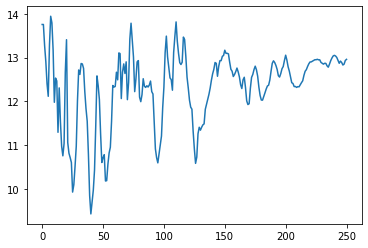

In [142]:
plt.plot(list(range(encoder_3views_psnr.shape[0])), encoder_3views_psnr)

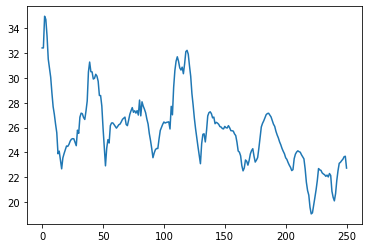

In [141]:
plt.plot(list(range(psnr_5views.shape[0])), psnr_5views)

In [119]:
# train_idxs = np.linspace(0,train_imgs.shape[0],3,False,dtype=int)
train_idxs = np.array([27,37,105])
train_idxs

array([ 27,  37, 105])

In [121]:
dtu_datadir = '/mnt/lustre/yslan/Repo/NVS/Projects/volume_rendering/srn_dataset/cars'
train_set, train_test = get_split_dataset(
    'dvr_dtu', srn_datadir, split=["train", "train_test"]
)

AssertionError: 

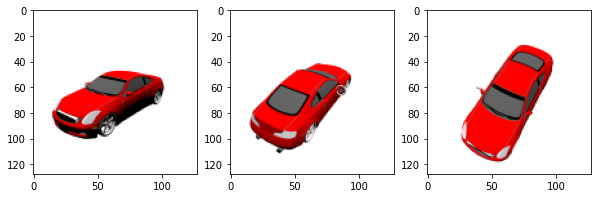

In [125]:
# plt.imshow(train_imgs[train_idxs][1])
w=3
h=2

fig=plt.figure(figsize=(10, 10))
columns = 3
rows = 1

for i in range(1, columns*rows +1):
#     img = np.random.randint(10, size=(h,w))
    img = train_imgs[train_idxs][i-1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

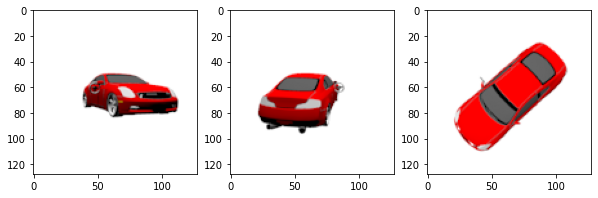

In [132]:
# plt.imshow(train_imgs[train_idxs][1])
selected_test_encode_views = [0,31,220]
w=3
h=2

fig=plt.figure(figsize=(10, 10))
columns = 3
rows = 1

for i in range(1, columns*rows +1):
#     img = np.random.randint(10, size=(h,w))
    img = test_imgs[selected_test_encode_views][i-1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

In [131]:
rk = np.argsort(psnr_3views)[::-1]
rk[::-1]

array([  0,   1,   2,   3,   4, 220,   5,  47, 219,   6, 221,  46,  31,
         7,  32,  33,  48,  20,  34,  36,   8,  35,  37,  45,  30, 240,
        49,  39,  40,  38,  21,   9,  19,  41, 239,  42, 218,  10,  43,
       222,  29, 241,  44,  11,  18,  12,  28,  50, 238,  13,  14,  27,
        86,  17,  15,  87,  16,  81,  80,  84,  82,  85,  26, 217,  83,
        79, 223,  22, 242,  78,  89, 161,  25,  88,  51,  77, 162,  24,
       163, 158, 164,  23, 224, 215, 216, 157, 160, 123, 155, 124, 154,
        76, 156, 237, 152, 153, 225, 159,  52, 151, 204, 150, 214, 125,
       149, 181,  90, 203, 226, 148, 165, 182, 227,  75, 126, 183, 228,
       127, 180, 122, 147, 229, 205, 202,  74,  91,  53, 184, 213, 231,
       230, 243, 146, 250, 232, 145, 236,  92, 166, 201, 233, 185, 144,
       143, 212, 140, 128, 234,  54, 196, 197, 179,  98, 142,  73, 139,
       235, 195, 200, 177,  93, 206, 178,  99, 211, 194, 186, 129, 141,
        97, 198,  72, 138, 169, 167, 210, 187,  55, 168,  71, 20

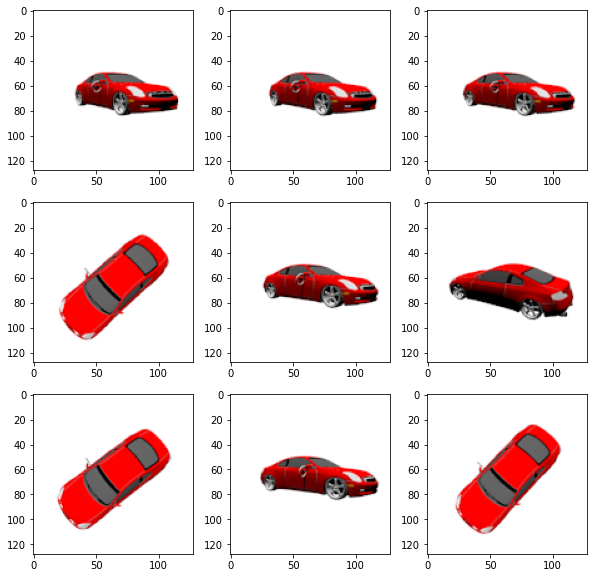

In [130]:
# plt.imshow(train_imgs[train_idxs][1])
w=3
h=2

fig=plt.figure(figsize=(10, 10))
columns = 3
rows = 3

for i in range(1, columns*rows +1):
#     img = np.random.randint(10, size=(h,w))
    img = test_imgs[rk[-(i+2)]]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

In [147]:
c2w=poses[0]

In [150]:
from util.run_nerf_helpers import unproj_map

In [155]:
d=torch.Tensor([ 0.6585, -0.7381, -0.1466])
d

tensor([ 0.6585, -0.7381, -0.1466])

In [154]:
d @ c2w[:3,:3].T

tensor([-0.6610,  0.1349, -0.7381])

In [163]:
torch.cat([d,torch.tensor([1])])

tensor([ 0.6585, -0.7381, -0.1466,  1.0000])

In [5]:
Y,X=torch.meshgrid(
torch.arange(10),torch.arange(10))

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
        [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
        [6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
        [7, 7, 7, 7, 7, 7, 7, 7, 7, 7],
        [8, 8, 8, 8, 8, 8, 8, 8, 8, 8],
        [9, 9, 9, 9, 9, 9, 9, 9, 9, 9]])

In [7]:
X

tensor([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [14]:
grid=torch.stack((X,Y), dim=-1)

In [15]:
grid[3,5]

tensor([5, 3])

In [16]:
import kornia as K

In [22]:
grid=K.create_meshgrid(6,10,False)
i,j = grid.unbind(-1)

In [41]:
import numpy as np
x = np.arange(7)
y = np.arange(3)

In [43]:
xv, yv = np.meshgrid(x,y,indexing='ij')

In [44]:
xv

array([[0, 0, 0],
       [1, 1, 1],
       [2, 2, 2],
       [3, 3, 3],
       [4, 4, 4],
       [5, 5, 5],
       [6, 6, 6]])

In [50]:
Y,X = torch.meshgrid(torch.from_numpy(y),torch.from_numpy(x)) # 'xy' indexing

In [60]:
unproj_map = torch.stack((X,Y),-1)

In [61]:
unproj_map[2,4]

tensor([4, 2])

In [71]:
coords = torch.stack((Y,X),-1)

In [72]:
coords[2,4]

tensor([2, 4])

In [89]:
coords.shape

torch.Size([3, 7, 2])

In [93]:
torch.flip(coords, [2])

tensor([[[0, 0],
         [1, 0],
         [2, 0],
         [3, 0],
         [4, 0],
         [5, 0],
         [6, 0]],

        [[0, 1],
         [1, 1],
         [2, 1],
         [3, 1],
         [4, 1],
         [5, 1],
         [6, 1]],

        [[0, 2],
         [1, 2],
         [2, 2],
         [3, 2],
         [4, 2],
         [5, 2],
         [6, 2]]])

In [94]:
coords

tensor([[[0, 0],
         [0, 1],
         [0, 2],
         [0, 3],
         [0, 4],
         [0, 5],
         [0, 6]],

        [[1, 0],
         [1, 1],
         [1, 2],
         [1, 3],
         [1, 4],
         [1, 5],
         [1, 6]],

        [[2, 0],
         [2, 1],
         [2, 2],
         [2, 3],
         [2, 4],
         [2, 5],
         [2, 6]]])

<>:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-101-e594c2b2a3bb>:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
  a is '123'


True

In [106]:
torch.rand(4,4).reshape(16,1)[:10][::2]

tensor([[0.9767],
        [0.5717],
        [0.9241],
        [0.6529],
        [0.9316]])

In [143]:
np.arange(0,5)

array([0, 1, 2, 3, 4])